 Student Performance Indicator - Project - Exploratory Data Analysis

Problem Statement :
The project understands how the student's performance(test score) affected by other variables like Gender, Ethenticity, Parental level of Education,Lunch and Test Preparation Course 

Data Collection :
Dataset : https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

contains 8 columns and 1000 rows

1. Import Data and Required Packages 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:\Users\sneha\Documents\mlprojects\notebook\data\stud.csv")

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [6]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

Data Checks to Perform

1. Number of Missinng Values
2. Check Duplicates
3. Check Datatype
4. Check the number of unique values of each column
5. Statistics of the dataset
6. Check various categories present in the different Categorical Column

In [7]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

so there is no missing values in the dataset

In [8]:
# check duplicate 

df.duplicated().sum()

np.int64(0)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
# Statistics
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


so there are three numerical features :
1. math_score,
2. reading_score,
3. writing_score

observations :

1. All means are close to each other;
2. All standard deviations are also close range 14.60 to 15.19;
3. for math_score minimum is 0, for reading_score minimum is much higher 17 whereas writing_score minimum is 10

In [11]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [12]:
# check unique values of all columns

print(f"unique values in 'gender' variable : \n",df['gender'].unique())
print(f"unique values in 'race_ethnicity' variable : \n",df['race_ethnicity'].unique())
print(f"unique values in 'parental_level_of_education' variable : \n",df['parental_level_of_education'].unique())
print(f"unique values in 'parental_level_of_education' variable : \n",df['parental_level_of_education'].unique())
print(f"unique values in 'lunch' variable : \n",df['lunch'].unique())
print(f"unique values in 'test_preparation_course' variable : \n",df['test_preparation_course'].unique())

unique values in 'gender' variable : 
 ['female' 'male']
unique values in 'race_ethnicity' variable : 
 ['group B' 'group C' 'group A' 'group D' 'group E']
unique values in 'parental_level_of_education' variable : 
 ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
unique values in 'parental_level_of_education' variable : 
 ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
unique values in 'lunch' variable : 
 ['standard' 'free/reduced']
unique values in 'test_preparation_course' variable : 
 ['none' 'completed']


In [20]:
# define numerical and categorical columns

numeric_features = []
for feature in df.columns:
    if df[feature].dtype != 'O' :
        numeric_features.append(feature)
print(numeric_features)
print(f"length of numerical features : ",len(numeric_features))



['math_score', 'reading_score', 'writing_score']
length of numerical features :  3


In [21]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print(categorical_features)
print(f"length of categorical features : ",len(categorical_features))

['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
length of categorical features :  5


In [22]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Adding numerical score and get "Total Score" and "Average Score" Column :

In [24]:
df["total_score"] = df["math_score"] + df["reading_score"] + df["writing_score"]
df["average_score"] = df["total_score"]/3

In [25]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


Get count of student geting full marks 

In [32]:
math_full_score = df[df["math_score"]==100]["average_score"].count()
print("Number of students with Full Marks in math :",math_full_score)

Number of students with Full Marks in math : 7


In [33]:
reading_full_score = df[df["reading_score"]==100]["average_score"].count()
print("Number of students with Full Marks in reading : ",reading_full_score)

Number of students with Full Marks in reading :  17


In [35]:
writing_full_score = df[df["writing_score"]==100]["average_score"].count()
print("Number of students with Full Marks in writing : ",writing_full_score)

Number of students with Full Marks in writing :  14


## Exploring Data (Visualization)

Visualize average score distribution to get some conclusion using histogram

In [36]:
import matplotlib.pyplot as plt

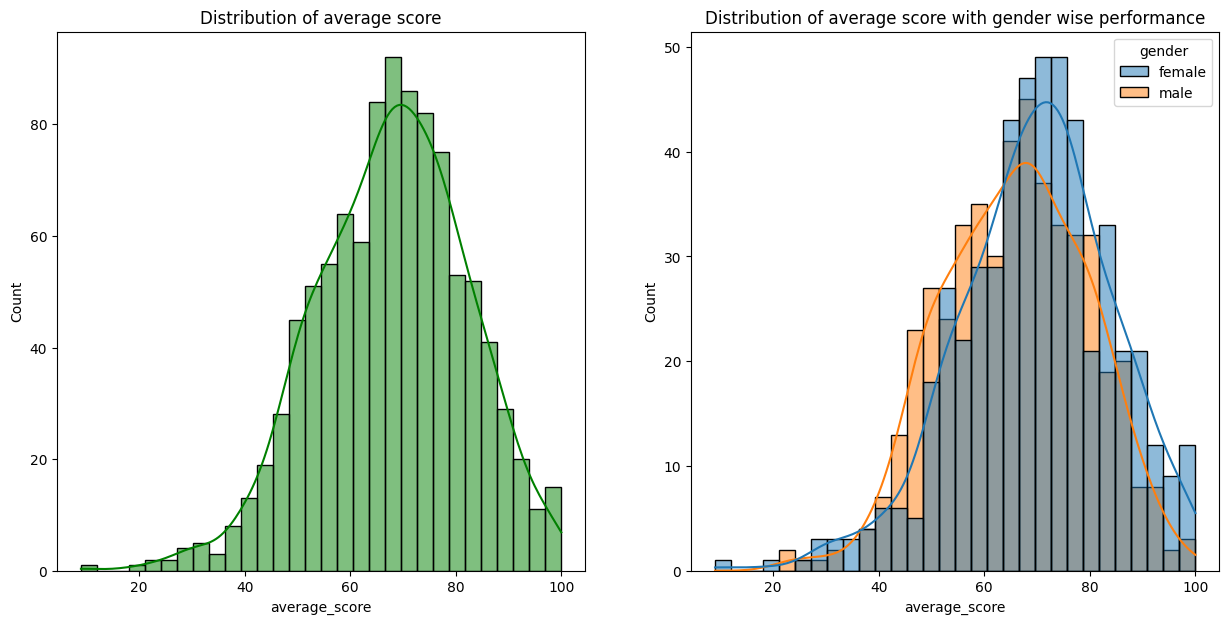

In [47]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
# plt.Subplot(121)
sns.histplot(data=df,
             x="average_score",
             bins=30,
             kde=True,
             color='g',
             ax=axs[0])
axs[0].set_title("Distribution of average score");

sns.histplot(data=df,
             x="average_score",
             bins=30,
             kde=True,
             color='skyblue',
             hue='gender',
             ax = axs[1])
axs[1].set_title("Distribution of average score with gender wise performance");

Visualize average score distribution to get some conclusion using histogram

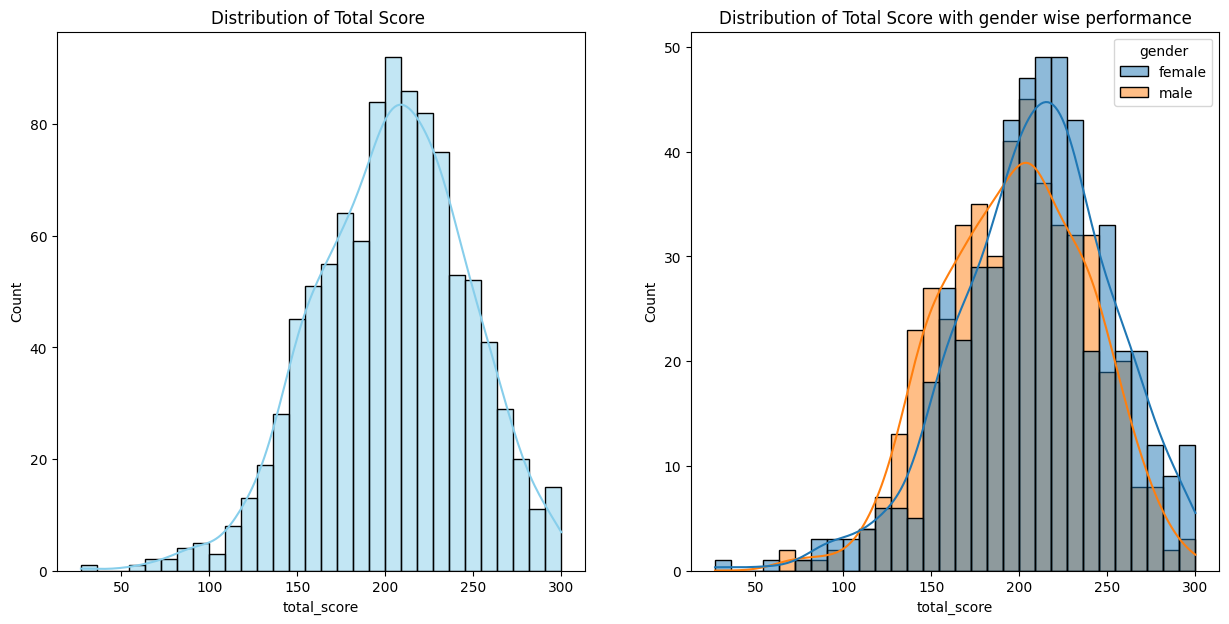

In [56]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
sns.histplot(data=df,
             x="total_score",
             bins=30,
             kde=True,
             color = 'skyblue',
             ax = axs[0])
axs[0].set_title("Distribution of Total Score ");

sns.histplot(data=df,
             x="total_score",
             bins=30,
             kde=True,
             color = 'g',
             hue="gender",
             ax = axs[1])
axs[1].set_title("Distribution of Total Score with gender wise performance");



Insights : Females are performing well than Mens